Чтение данных...
Прочитано 958001 точек
Диапазон x: [-3.99, 3.99]
Диапазон y: [-0.99, 5.00]
Диапазон w: [0.0000, 0.7537]
Интерполяция данных...


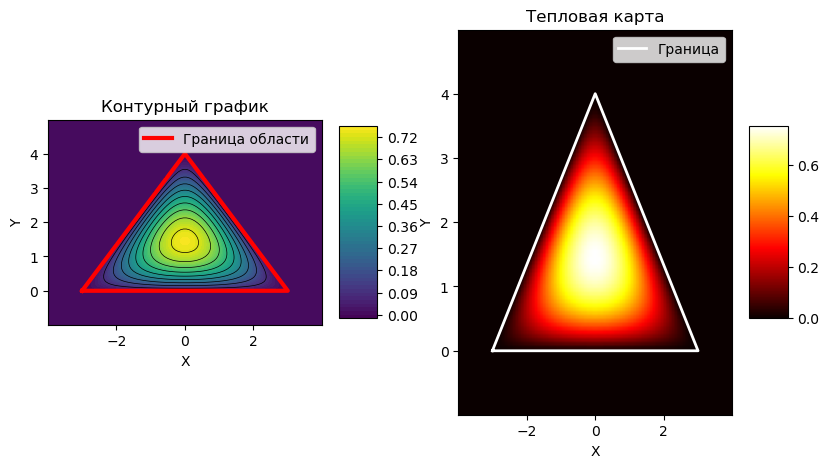

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Чтение данных из файла
print("Чтение данных...")
data = np.loadtxt('solution.txt', skiprows=1)
x = data[:, 0]
y = data[:, 1]
w = data[:, 2]

print(f"Прочитано {len(x)} точек")
print(f"Диапазон x: [{x.min():.2f}, {x.max():.2f}]")
print(f"Диапазон y: [{y.min():.2f}, {y.max():.2f}]")
print(f"Диапазон w: [{w.min():.4f}, {w.max():.4f}]")

# Создание регулярной сетки для визуализации
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Интерполяция на регулярную сетку
print("Интерполяция данных...")
zi = griddata((x, y), w, (xi, yi), method='cubic')

# Вершины треугольника для отрисовки
triangle_x = [-3, 3, 0, -3]
triangle_y = [0, 0, 4, 0]

# Создание графиков
fig = plt.figure(figsize=(15, 5))

# 1. Контурный график
ax2 = fig.add_subplot(132)
contour = ax2.contourf(xi, yi, zi, levels=50, cmap='viridis')
ax2.contour(xi, yi, zi, levels=10, colors='black', linewidths=0.5)
ax2.plot(triangle_x, triangle_y, 'r-', linewidth=3, label='Граница области')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Контурный график')
ax2.legend()
ax2.set_aspect('equal')
plt.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)

# 2. Тепловая карта
ax3 = fig.add_subplot(133)
im = ax3.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], 
               origin='lower', cmap='hot', aspect='auto')
ax3.plot(triangle_x, triangle_y, 'w-', linewidth=2, label='Граница')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Тепловая карта')
ax3.legend()
plt.colorbar(im, ax=ax3, shrink=0.5, aspect=5)

plt.show()


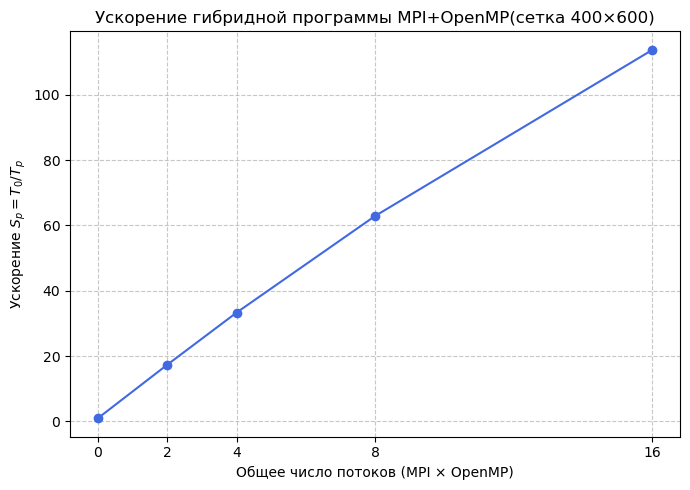

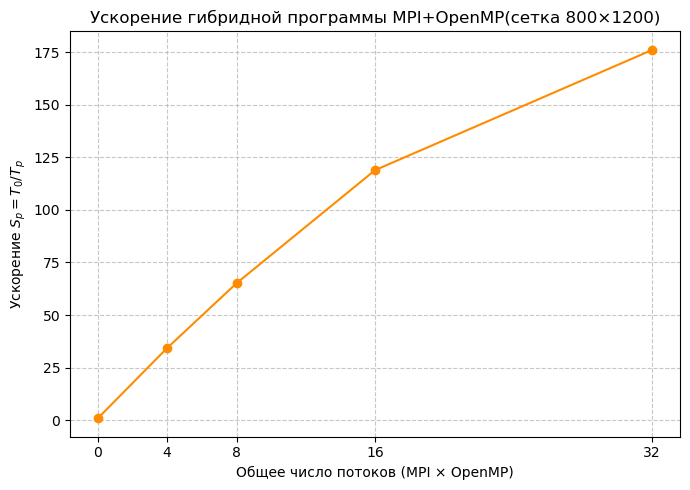

In [5]:
import matplotlib.pyplot as plt

# -------------------------------
# Данные из отчёта
# -------------------------------

# Сетка 400×600
total_threads_400 = [0, 2, 4, 8, 16]  # общее число потоков (MPI × OpenMP)
speedup_400 = [1.0, 17.36, 33.31, 62.90, 113.73]

# Сетка 800×1200
total_threads_800 = [0, 4, 8, 16, 32]  # общее число потоков (MPI × OpenMP)
speedup_800 = [1.0, 34.38, 65.13, 118.88, 176.00]

# -------------------------------
# График 1 — для сетки 400×600
# -------------------------------
plt.figure(figsize=(7, 5))
plt.plot(total_threads_400, speedup_400, marker='o', linestyle='-', color='royalblue')
plt.title('Ускорение гибридной программы MPI+OpenMP(сетка 400×600)')
plt.xlabel('Общее число потоков (MPI × OpenMP)')
plt.ylabel('Ускорение $S_p = T_0 / T_p$')
plt.xticks(total_threads_400)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('speedup_400x600.png', dpi=300)
plt.show()

# -------------------------------
# График 2 — для сетки 800×1200
# -------------------------------
plt.figure(figsize=(7, 5))
plt.plot(total_threads_800, speedup_800, marker='o', linestyle='-', color='darkorange')
plt.title('Ускорение гибридной программы MPI+OpenMP(сетка 800×1200)')
plt.xlabel('Общее число потоков (MPI × OpenMP)')
plt.ylabel('Ускорение $S_p = T_0 / T_p$')
plt.xticks(total_threads_800)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('speedup_800x1200.png', dpi=300)
plt.show()

